# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [70]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(6, 4)

sns.set()
sns.set(color_codes=True)

## Parte 1

### _Setup_ da parte 1

In [71]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [72]:
# Sua análise da parte 1 começa aqui.
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


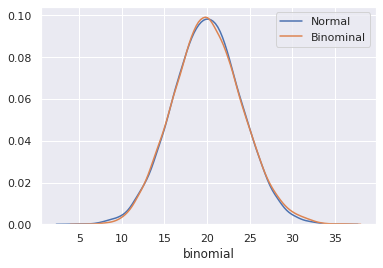

In [73]:
#Verificando a distribuição

sns.distplot(dataframe['normal'], hist=False, label='Normal')
sns.distplot(dataframe['binomial'], hist=False, label='Binominal')

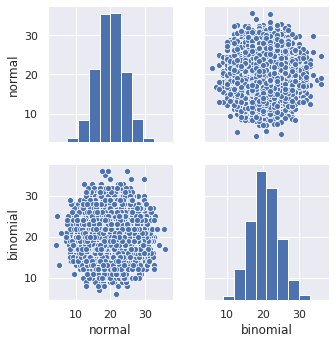

In [74]:
# Verificando a distribuição dos dados.

sns.pairplot(dataframe)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [75]:
def q1():
    d = dataframe.describe()
    q_norm = [d.loc['25%'][0], d.loc['50%'][0], d.loc['75%'][0]]
    q_binom = [d.loc['25%'][1], d.loc['50%'][1], d.loc['75%'][1]]
    return tuple(np.round(np.subtract(q_norm, q_binom),3))
    pass
q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

_R = De acordo com os graficos de distribuição, os valores dos quantis apensar da sequentencia normal e binomial, seguem a mesma proporção, a de uma distribuição Normal. Por isso a diferença entre os quantis tão baixa._


## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [76]:
def q2():
    v_intervalo_m = dataframe['normal'].mean() - dataframe['normal'].std()
    v_intervalo_p = dataframe['normal'].mean() + dataframe['normal'].std()

    ecdf = ECDF(dataframe['normal'])

    intervalo = np.round(ecdf(v_intervalo_p) - ecdf(v_intervalo_m),3)
    return float(intervalo)
    pass
q2()

0.684

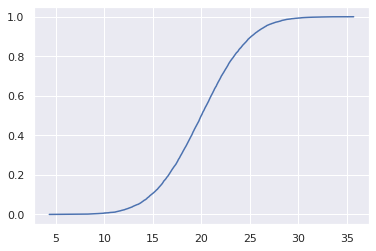

In [77]:
#Visualização dos dav_intervalo_m = dataframe['normal'].mean() - dataframe['normal'].std()
v_intervalo_m = dataframe['normal'].mean() - dataframe['normal'].std()
v_intervalo_p = dataframe['normal'].mean() + dataframe['normal'].std()

ecdf = ECDF(dataframe['normal'])
plt.plot(ecdf.x, ecdf.y)

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [78]:
def q3():
    diff_mean = np.round(dataframe['binomial'].mean() - dataframe['normal'].mean(),3)
    diff_vari = np.round(dataframe['binomial'].var() - dataframe['normal'].var(), 3)
    return tuple((diff_mean, diff_vari))
    pass
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [79]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [80]:
# Sua análise da parte 2 começa aqui.
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


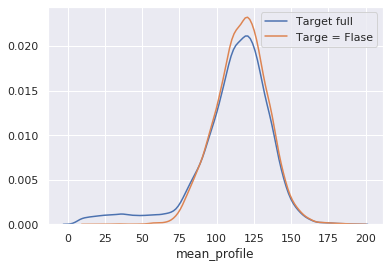

In [81]:
#Visualiando as distribuições

sns.distplot(stars['mean_profile'], hist=False, label='Target full')
sns.distplot(stars[stars['target'] == False]['mean_profile'], hist=False, label='Targe = Flase')

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

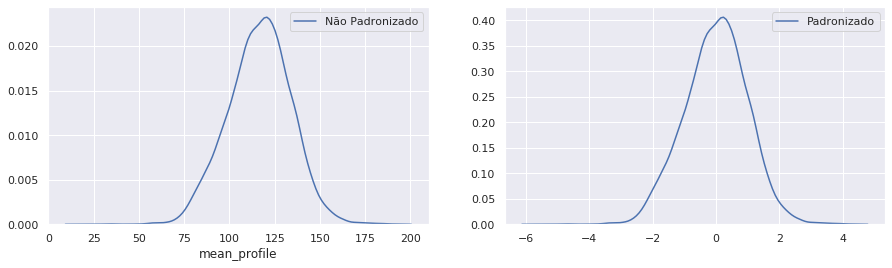

(0.806, 0.911, 0.959)

In [85]:
#Filtrando os dados
pulsarFiltro = stars[stars['target'] == False]['mean_profile']

#padronizando com z-score
from scipy import stats
false_pulsar_mean_profile_standardized = stats.zscore(pulsarFiltro)

#Visualizando em gráfico
figure, axs = plt.subplots(1,2, figsize=(15,4))
sns.distplot(pulsarFiltro, hist=False, label='Não Padronizado', ax = axs[0])
sns.distplot(false_pulsar_mean_profile_standardized, hist=False, label='Padronizado', ax = axs[1])
plt.show()

#Separando os quantis e a CDF empírica
quantis = sct.norm.ppf([0.8, 0.9, 0.95], loc=0, scale=1)
ecdf = ECDF(false_pulsar_mean_profile_standardized)
tuple(ecdf(quantis).round(3))


In [83]:
def q4():
    # Retorne aqui o resultado da questão 4.
    quantis = sct.norm.ppf([0.8, 0.9, 0.95], loc=0, scale=1)
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    return tuple(ecdf(quantis).round(3))
    pass
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [84]:
def q5():
    # Retorne aqui o resultado da questão 5.
    quantis_padronizados = np.quantile(false_pulsar_mean_profile_standardized,(0.25, 0.5, 0.75))
    quantis_teoricos = sct.norm.ppf([0.25, 0.5, 0.75], 0, 1)
    return tuple((quantis_padronizados - quantis_teoricos).round(3))
    pass
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.